In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Covid Predesposition/covid.csv')

In [3]:
pd.set_option('display.max_columns',None)
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [4]:
df.shape

(566602, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [6]:
df.dtypes

id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

## Descriptives, Feature Engineering and Visualizations

In this section we manipulate the dataframe to get a better understanding of the data.

In [7]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


In [8]:
df = df.rename(columns = {'patient_type':'outpatient'})
# makes column easier to understand

<AxesSubplot:ylabel='sex'>

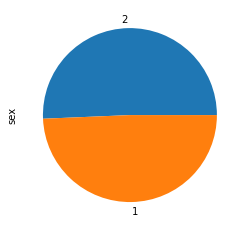

In [9]:
df.sex.value_counts().plot.pie()
# We can see an almost equal distribution of male and females in the dataset

C:\Users\James\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

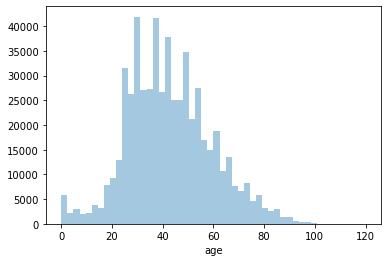

In [10]:
sns.distplot(df.age, kde=False)
# Here we can see a distribution of age centering around 40 years.

In [11]:
df.age.mean()
# just to confirm

42.62248280097847

In [12]:
# change the the dates column to datetime type 
df.entry_date = pd.to_datetime(df.entry_date, dayfirst=True)
df.date_symptoms = pd.to_datetime(df.date_symptoms, dayfirst=True)
df.head()

,id,sex,outpatient,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-05-04,2020-05-02,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-04-06,2020-04-01,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-04-10,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


<AxesSubplot:xlabel='entry_date'>

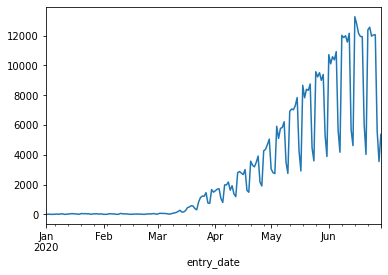

In [13]:
df.groupby(df.entry_date)['outpatient'].count().plot()
# plot shows increasing amount of cases in the dataset over time
# there are dips, probably for analysis with something like prophet

<AxesSubplot:xlabel='entry_date'>

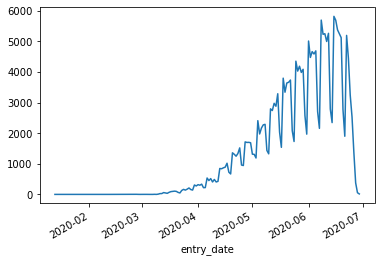

In [14]:
df.query('covid_res=="1"').groupby(df.entry_date)['outpatient'].count().plot()
# here we see a timeline similar to above where there is an increasing amount of people testing positive

In [15]:
df.icu.value_counts()
# This will be the target variable but we are interested in covid positive ICU patients

97    444689
2     111676
1      10112
99       125
Name: icu, dtype: int64

In [16]:
df_positive = df[df.covid_res==1]
# only positive cases will be included
df_in_positive = df_positive[df_positive.outpatient==2]
# only positive and inpatients will be included
df_in_positive = df_in_positive[df_in_positive.icu!=97]
df_in_positive = df_in_positive[df_in_positive.icu!=99]
df_in_positive.reset_index(drop=True)

,id,sex,outpatient,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,167386,1,2,2020-04-06,2020-04-01,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
1,0b5948,2,2,2020-04-17,2020-04-10,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
2,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
3,1beec8,2,2,2020-04-16,2020-04-16,29-04-2020,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
4,1.75E+56,2,2,2020-04-22,2020-04-13,9999-99-99,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,1a4ec8,2,2,2020-06-18,2020-06-11,9999-99-99,2,1,67,97,2,2,2,2,2,2,2,2,2,2,1,1,2
68206,0a6ada,2,2,2020-03-29,2020-03-25,9999-99-99,1,1,65,97,1,2,2,2,1,2,2,1,2,2,2,1,1
68207,16fceb,1,2,2020-03-29,2020-03-27,9999-99-99,2,1,29,2,2,2,2,2,2,2,2,2,2,2,2,1,2
68208,27424,1,2,2020-06-10,2020-06-08,10-06-2020,2,1,88,2,1,2,2,2,1,2,2,2,2,2,99,1,2


<AxesSubplot:ylabel='sex'>

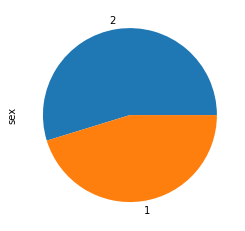

In [17]:
df_positive.sex.value_counts().plot.pie()


In [18]:
(df_positive.sex.value_counts()/df_positive.sex.count())*100

2    54.745147
1    45.254853
Name: sex, dtype: float64

In [19]:
df_in_positive.icu.value_counts()
# We have a disparity of about 10 to 1 of covid-positive inpatients who went to ICU

2    62388
1     5822
Name: icu, dtype: int64

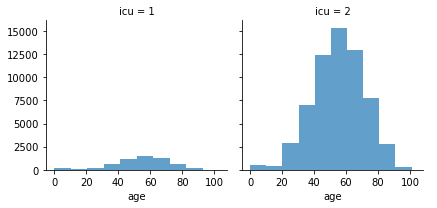

In [20]:
g = sns.FacetGrid(df_in_positive, col='icu' )
g.map(plt.hist, 'age', alpha=.7)
g.add_legend()
# Covid positive inpatients that end up needing ICU seem to have the same distribution as those covid positive inpatients that do not end up in ICU

<AxesSubplot:xlabel='icu', ylabel='age'>

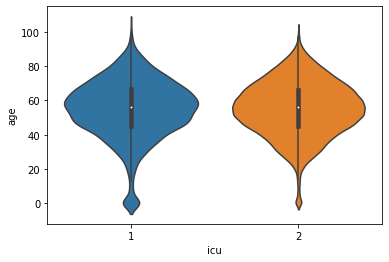

In [21]:
sns.violinplot(x = 'icu', y = 'age', data = df_in_positive)
# same as above

<AxesSubplot:ylabel='sex'>

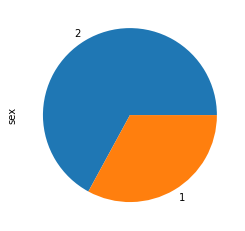

In [22]:
df_in_positive.query('icu=="1"')['sex'].value_counts().plot.pie()
# We see a disparity in amount of covid positive icu cases between male(2) and female(1)

In [23]:
df_icu_positive = df_in_positive[df_in_positive.icu==1]
# all covid positive icu cases
df_icu_positive.reset_index(drop=True)

,id,sex,outpatient,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,1beec8,2,2,2020-04-16,2020-04-16,29-04-2020,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
1,077c96,2,2,2020-04-30,2020-04-30,15-05-2020,1,1,66,97,2,2,2,2,2,2,2,2,2,2,99,1,1
2,0046aa,2,2,2020-04-22,2020-04-22,03-05-2020,2,1,58,97,1,2,2,2,2,1,2,2,2,2,99,1,1
3,1d8440,1,2,2020-04-14,2020-04-14,9999-99-99,2,1,31,2,2,2,2,2,2,2,2,2,2,2,99,1,1
4,03da5d,1,2,2020-04-29,2020-04-28,01-06-2020,2,1,58,2,2,2,2,2,1,2,2,1,2,2,99,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5.00E+219,2,2,2020-06-03,2020-06-01,06-06-2020,2,1,70,97,1,2,2,2,1,2,2,1,2,2,2,1,1
5818,07f1d1,1,2,2020-05-01,2020-04-24,02-05-2020,1,1,57,2,2,2,1,2,1,2,1,1,2,2,1,1,1
5819,0ecd13,1,2,2020-05-03,2020-04-24,9999-99-99,2,1,28,2,2,2,2,2,2,2,2,1,2,2,2,1,1
5820,15629d,2,2,2020-05-19,2020-05-15,27-05-2020,1,1,58,97,2,2,2,2,2,2,2,2,2,2,1,1,1


<AxesSubplot:ylabel='Frequency'>

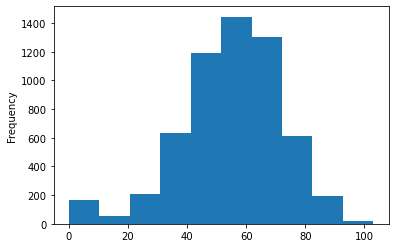

In [24]:
df_icu_positive.age.plot(kind='hist')

<AxesSubplot:xlabel='sex', ylabel='age'>

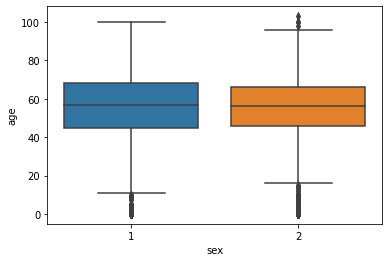

In [25]:
sns.boxplot(x = 'sex', y = 'age', data = df_icu_positive)

<AxesSubplot:ylabel='sex'>

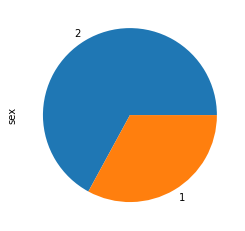

In [26]:
df_icu_positive.sex.value_counts().plot.pie()
# There is double the amount of males who are covid positive in ICU

### Preprocessing

In [27]:
df_in_positive.head()

,id,sex,outpatient,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,167386,1,2,2020-04-06,2020-04-01,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-04-10,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,2020-04-16,2020-04-16,29-04-2020,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,2020-04-22,2020-04-13,9999-99-99,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2


In [28]:
df_in_positive = df_in_positive.drop(['id', 'outpatient','entry_date', 'date_symptoms', 'pregnancy','date_died', 'intubed', 'contact_other_covid','covid_res'],axis='columns')
df_in_positive = df_in_positive.reset_index(drop=True)
# Drop all columns that are not needed for this exercise 

In [29]:
df_in_positive.head()

,sex,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
0,1,2,54,2,2,2,2,2,2,2,1,2,2,2
1,2,1,30,2,2,2,2,2,2,2,2,2,2,2
2,1,2,60,1,2,2,2,1,2,1,2,2,2,2
3,2,1,47,1,2,2,2,2,2,2,2,2,2,1
4,2,2,63,2,2,2,2,1,2,2,2,2,2,2


In [30]:
df_in_positive.isin([99]).sum()
# check for all 99 values in the df, no action needed

sex                0
pneumonia          0
age               10
diabetes           0
copd               0
asthma             0
inmsupr            0
hypertension       0
other_disease      0
cardiovascular     0
obesity            0
renal_chronic      0
tobacco            0
icu                0
dtype: int64

In [31]:
df_in_positive.isin([98]).sum()
# Check for 98's in the df

sex                 0
pneumonia           0
age                12
diabetes          380
copd              342
asthma            346
inmsupr           393
hypertension      360
other_disease     585
cardiovascular    386
obesity           405
renal_chronic     363
tobacco           382
icu                 0
dtype: int64

In [32]:
notagecol = ['diabetes','copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease','cardiovascular','obesity','renal_chronic','tobacco']
# remove all rows with 98's 
for col in notagecol:
    df_in_positive = df_in_positive[df_in_positive[col]!=98]

df_in_positive.reset_index(drop=True) 


,sex,pneumonia,age,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,icu
0,1,2,54,2,2,2,2,2,2,2,1,2,2,2
1,2,1,30,2,2,2,2,2,2,2,2,2,2,2
2,1,2,60,1,2,2,2,1,2,1,2,2,2,2
3,2,1,47,1,2,2,2,2,2,2,2,2,2,1
4,2,2,63,2,2,2,2,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67295,2,1,67,2,2,2,2,2,2,2,2,2,2,2
67296,2,1,65,1,2,2,2,1,2,2,1,2,2,1
67297,1,1,29,2,2,2,2,2,2,2,2,2,2,2
67298,1,1,88,1,2,2,2,1,2,2,2,2,2,2


In [33]:
df_in_positive.isin([98]).sum()

sex                0
pneumonia          0
age               12
diabetes           0
copd               0
asthma             0
inmsupr            0
hypertension       0
other_disease      0
cardiovascular     0
obesity            0
renal_chronic      0
tobacco            0
icu                0
dtype: int64

In [34]:
df_in_positive.isin([97]).sum()
# Check for all 97's in the df

sex                0
pneumonia          0
age               20
diabetes           0
copd               0
asthma             0
inmsupr            0
hypertension       0
other_disease      0
cardiovascular     0
obesity            0
renal_chronic      0
tobacco            0
icu                0
dtype: int64

In [35]:
df_in_positive['age'] = pd.cut(df_in_positive['age'], bins=[0,20,40,60,300], labels=[1,2,3,4])

In [36]:
df_in_positive['age'].value_counts()

3    29908
4    25768
2    10507
1      849
Name: age, dtype: int64

<AxesSubplot:ylabel='icu'>

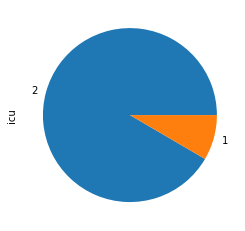

In [37]:
df_in_positive.icu.value_counts().plot.pie()

In [38]:
(df_in_positive.icu.value_counts()/df_in_positive.icu.count())*100
# There is a 10 to 1 discrepancy between those who ended up in patients who ended up in icu and those who did not

2    91.579495
1     8.420505
Name: icu, dtype: float64

In [39]:
df_in_positive.icu.value_counts()

2    61633
1     5667
Name: icu, dtype: int64

<AxesSubplot:>

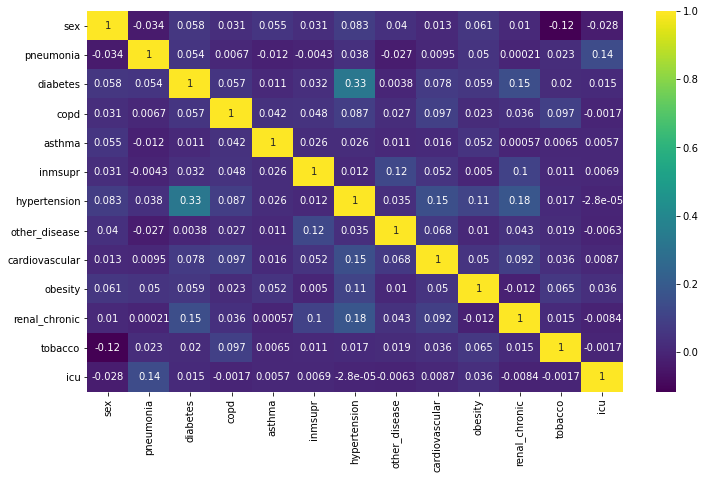

In [40]:
plt.figure(figsize=(12,7))
sns.heatmap(df_in_positive.corr(),annot=True, cmap='viridis')

In [41]:
from sklearn.utils import resample

In [42]:
df_majority = df_in_positive[df_in_positive.icu==2]
df_minority = df_in_positive[df_in_positive.icu==1]

df_downsamp_majority = resample(df_majority,
                               replace=False,
                               n_samples=5667,
                               random_state=123)

df_downsampled = pd.concat([df_downsamp_majority,df_minority])
df_downsampled.icu.value_counts()

2    5667
1    5667
Name: icu, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [44]:
X = df_downsampled.drop('icu',axis=1)
y = df_downsampled.icu

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Logistic Regression

In [46]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=1000)

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn import metrics

In [49]:
print(metrics.accuracy_score(y_test, predictions))

0.4972067039106145


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.50      1.00      0.66      1691
           2       0.00      0.00      0.00      1710

    accuracy                           0.50      3401
   macro avg       0.25      0.50      0.33      3401
weighted avg       0.25      0.50      0.33      3401



C:\Users\James\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Use scaler

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_train.shape

(7933, 13)

In [54]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [55]:
predictions_scaled = logmodel.predict(X_test)

In [56]:
print(metrics.accuracy_score(y_test, predictions_scaled))

0.6165833578359307


In [57]:
print(classification_report(y_test,predictions_scaled))

              precision    recall  f1-score   support

           1       0.57      0.89      0.70      1691
           2       0.76      0.35      0.48      1710

    accuracy                           0.62      3401
   macro avg       0.67      0.62      0.59      3401
weighted avg       0.67      0.62      0.59      3401



### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
rfc_pred = rfc.predict(X_test)

In [60]:
print(metrics.accuracy_score(y_test, rfc_pred))

0.6165833578359307


In [61]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.58      0.79      0.67      1691
           2       0.68      0.45      0.54      1710

    accuracy                           0.62      3401
   macro avg       0.63      0.62      0.61      3401
weighted avg       0.63      0.62      0.61      3401

[[1334  357]
 [ 947  763]]


### Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [63]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.57      0.86      0.69      1691
           2       0.72      0.36      0.48      1710

    accuracy                           0.61      3401
   macro avg       0.65      0.61      0.58      3401
weighted avg       0.65      0.61      0.58      3401

[[1453  238]
 [1091  619]]


### KNN 

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [65]:
X = df_downsampled.drop('icu',axis=1).values
y = df_downsampled.icu.values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [67]:
X_train = scaler.fit_transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

In [69]:
model = Sequential()

In [70]:
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [71]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          batch_size=1000,
          validation_data=(X_test, y_test), 
          )

Train on 7933 samples, validate on 3401 samples
Epoch 1/50
7933/7933 [==============================] - 10s 1ms/sample - loss: -0.1699 - val_loss: -0.5962
Epoch 2/50
7933/7933 [==============================] - 0s 51us/sample - loss: -1.0662 - val_loss: -1.5935
Epoch 3/50
7933/7933 [==============================] - 0s 42us/sample - loss: -2.2328 - val_loss: -3.0460
Epoch 4/50
7933/7933 [==============================] - 0s 38us/sample - loss: -4.0493 - val_loss: -5.4158
Epoch 5/50
7933/7933 [==============================] - 0s 32us/sample - loss: -7.0519 - val_loss: -9.3718
Epoch 6/50
7933/7933 [==============================] - 0s 30us/sample - loss: -11.9205 - val_loss: -15.7938
Epoch 7/50
7933/7933 [==============================] - 0s 28us/sample - loss: -19.9617 - val_loss: -25.9671
Epoch 8/50
7933/7933 [==============================] - 0s 29us/sample - loss: -31.9745 - val_loss: -41.4612
Epoch 9/50
7933/7933 [==============================] - 0s 27us/sample - loss: -50.3503 - 

In [72]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

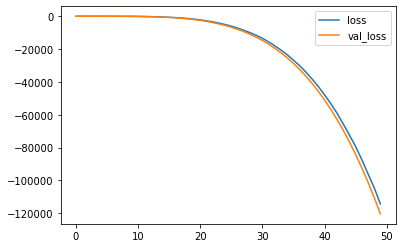

In [73]:
losses[['loss','val_loss']].plot()

In [74]:
predictions = model.predict_classes(X_test)

In [75]:
print(classification_report(y_test,predictions))
# Getting 0's on prediction of 2's

              precision    recall  f1-score   support

           1       0.50      1.00      0.66      1691
           2       0.00      0.00      0.00      1710

    accuracy                           0.50      3401
   macro avg       0.25      0.50      0.33      3401
weighted avg       0.25      0.50      0.33      3401



C:\Users\James\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
confusion_matrix(y_test,predictions)

array([[1691,    0],
       [1710,    0]], dtype=int64)